Script to explore the data, create models, and select the best model through validation of the training data set.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#read data
data = pd.read_csv('./numerai_training_data.csv')

#size and type, data
print('dimensions:')
print(data.shape)
print('rows:')
nrows=data.shape[0]
print(nrows)
print('columns:')
ncols=data.shape[1]
print(ncols) 

dimensions:
(535713, 54)
rows:
535713
columns:
54


In [2]:
#preview data
data.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target
0,nb5059fbc40534a1,era1,train,0.49282,0.58077,0.48948,0.56762,0.56107,0.51168,0.47459,...,0.40333,0.52337,0.60795,0.35748,0.49677,0.28295,0.65342,0.57915,0.51136,1
1,nb2bb43f474f2429,era1,train,0.53427,0.72712,0.61895,0.66238,0.47163,0.66996,0.37673,...,0.46847,0.44557,0.64831,0.28245,0.68554,0.26547,0.59322,0.53156,0.61621,0
2,n1e960207daad44a,era1,train,0.54888,0.46304,0.49582,0.52395,0.57362,0.46969,0.50229,...,0.74065,0.41003,0.43230,0.78286,0.52214,0.43961,0.46139,0.61272,0.72566,1
3,n5e99b4326e6f463,era1,train,0.64488,0.56167,0.72591,0.52219,0.49311,0.51511,0.45514,...,0.67751,0.43340,0.67009,0.50086,0.51208,0.58674,0.54358,0.58602,0.51818,0
4,nf454131816e5401,era1,train,0.45235,0.56569,0.54424,0.34145,0.67652,0.44318,0.45627,...,0.40709,0.58624,0.44531,0.66276,0.41992,0.58741,0.62276,0.31212,0.22357,0


From the preview above, the data is identified as a labeled training set; this is a supervised learning problem.

In [3]:
#data types
data.dtypes

id            object
era           object
data_type     object
feature1     float64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
feature35    float64
feature36    float64
feature37    float64
feature38    float64
feature39    float64
feature40    float64
feature41    float64
feature42    float64
feature43    float64
feature44    float64
feature45    

There are 50 features; their data type is float. The target is an integer. There are 3 other variables (id, era, data_type) typed object.

In [4]:
#check uniqueness of values, check for missing values and nans

#id
print('ID')
print('unique values:')
print(data.id.unique())
print('number of unique values:')
print(data.id.nunique())
print('number of rows in dataset:')
print(nrows)

ID
unique values:
['nb5059fbc40534a1' 'nb2bb43f474f2429' 'n1e960207daad44a' ...,
 'nc74ef5d1017b4f9' 'n47e612126c9b405' 'ncd4237ff29cb422']
number of unique values:
535713
number of rows in dataset:
535713


There is a unique ID for each row in the dataset.

In [5]:
#era
print('ERA')
print('unique values:')
print(data.era.unique())
print('number of unique values:')
print(data.era.nunique())
print('number of rows in dataset:')
print(nrows)
print('number of value counts:')
print(data.era.value_counts())

ERA
unique values:
['era1' 'era2' 'era3' 'era4' 'era5' 'era6' 'era7' 'era8' 'era9' 'era10'
 'era11' 'era12' 'era13' 'era14' 'era15' 'era16' 'era17' 'era18' 'era19'
 'era20' 'era21' 'era22' 'era23' 'era24' 'era25' 'era26' 'era27' 'era28'
 'era29' 'era30' 'era31' 'era32' 'era33' 'era34' 'era35' 'era36' 'era37'
 'era38' 'era39' 'era40' 'era41' 'era42' 'era43' 'era44' 'era45' 'era46'
 'era47' 'era48' 'era49' 'era50' 'era51' 'era52' 'era53' 'era54' 'era55'
 'era56' 'era57' 'era58' 'era59' 'era60' 'era61' 'era62' 'era63' 'era64'
 'era65' 'era66' 'era67' 'era68' 'era69' 'era70' 'era71' 'era72' 'era73'
 'era74' 'era75' 'era76' 'era77' 'era78' 'era79' 'era80' 'era81' 'era82'
 'era83' 'era84' 'era85']
number of unique values:
85
number of rows in dataset:
535713
number of value counts:
era34    6793
era25    6757
era24    6749
era31    6745
era26    6743
era32    6734
era27    6717
era33    6712
era28    6703
era29    6685
era30    6679
era23    6570
era35    6548
era36    6548
era71    6473
era

The data are grouped into 85 distinct eras. The number of observations in each era range from 5927-6793.

In [6]:
#data type
print('DATA TYPE')
print('unique values:')
print(data.data_type.unique())
print('number of unique values:')
print(data.data_type.nunique())

DATA TYPE
unique values:
['train']
number of unique values:
1


All data are training data.

In [7]:
#target
print('TARGET')
print('unique values:')
print(data.target.unique())
print('number of unique values:')
print(data.target.nunique())
print('number of value counts:')
print(data.target.value_counts())

TARGET
unique values:
[1 0]
number of unique values:
2
number of value counts:
0    267878
1    267835
Name: target, dtype: int64


There are 2 distinct target values, 0 and 1. Because the target values are discrete, this is a classification problem. Based on the value counts, the data appear pretty evenly distributed between 0 and 1.

In [8]:
#features
#descriptive statistics
#numerical
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target
count,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,...,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.000000,535713.00000
mean,0.472921,0.482357,0.538887,0.489979,0.536681,0.531812,0.465629,0.486717,0.532687,0.495880,...,0.469072,0.506042,0.509686,0.491432,0.505670,0.525091,0.539248,0.482097,0.496385,0.49996
std,0.113607,0.117309,0.100929,0.129855,0.095137,0.111722,0.112765,0.114449,0.113772,0.115777,...,0.122965,0.116461,0.118462,0.125189,0.105082,0.134487,0.096700,0.128133,0.127438,0.50000
min,0.000000,0.000000,0.000000,0.000000,0.038720,0.000000,0.006410,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.064210,0.000000,0.000000,0.004120,0.027490,0.000000,0.018030,0.00000
25%,0.392630,0.401900,0.470580,0.398310,0.477130,0.455020,0.388070,0.406730,0.456450,0.416750,...,0.382760,0.429080,0.427670,0.405710,0.434630,0.432880,0.474910,0.390870,0.407310,0.00000
50%,0.467900,0.481960,0.537910,0.481050,0.542930,0.531650,0.467170,0.483680,0.535040,0.495290,...,0.466460,0.507890,0.506990,0.491250,0.504690,0.529390,0.540200,0.477660,0.488770,0.00000
75%,0.548840,0.561510,0.606200,0.574150,0.602040,0.608950,0.543420,0.563750,0.611210,0.574360,...,0.552350,0.584660,0.588970,0.577010,0.576010,0.620770,0.604720,0.569660,0.579850,1.00000
max,0.982560,1.000000,1.000000,1.000000,0.969610,0.982570,1.000000,0.982170,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.994200,1.000000,1.00000


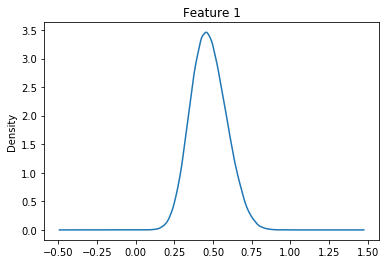

In [9]:
#visual ## work on this more. ideally display all 50 kdes/density plots for inspection
data.feature1.plot('density',title='Feature 1') #subplots

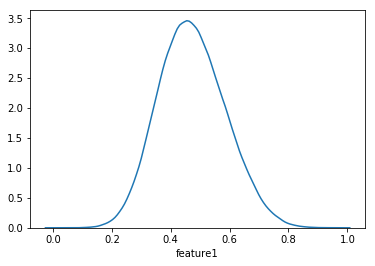

In [10]:
sns.distplot(data.feature1,hist=False)

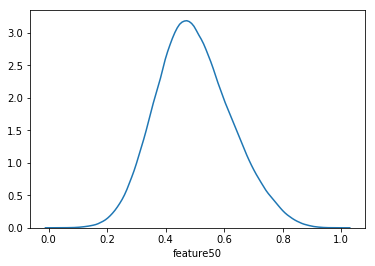

In [11]:
sns.distplot(data.feature50,hist=False)
#manually cycled through all 50 plots, looking at the distributions
#need to learn how to code these. and subplot them

From the statistics in the Table above and plots of each of the 50 features, the distribution of all features are all pretty similar. They are roughly symmetric about the mean and similar in range. 

In [12]:
#check if there are any missing values in the dataset
data.isnull().sum() #by column

id           0
era          0
data_type    0
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
feature35    0
feature36    0
feature37    0
feature38    0
feature39    0
feature40    0
feature41    0
feature42    0
feature43    0
feature44    0
feature45    0
feature46    0
feature47    0
feature48    0
feature49    0
feature50    0
target       0
dtype: int64

There are no missing values in the dataset.

In [13]:
#convert categorical data in era to indicator variables and store in a dataframe.
#Information in era might be useful later.
era_df = data.era.str.get_dummies()
print('ERA DATAFRAME')
print('dimensions:')
print(era_df.shape)
print('rows:')
print(era_df.shape[0])
print('columns:')
print(era_df.shape[1])
print('preview of era dataframe:')
era_df.head()

ERA DATAFRAME
dimensions:
(535713, 85)
rows:
535713
columns:
85
preview of era dataframe:


,era1,era10,era11,era12,era13,era14,era15,era16,era17,era18,...,era78,era79,era8,era80,era81,era82,era83,era84,era85,era9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# data type of era dataframe
era_df.dtypes

era1     int64
era10    int64
era11    int64
era12    int64
era13    int64
era14    int64
era15    int64
era16    int64
era17    int64
era18    int64
era19    int64
era2     int64
era20    int64
era21    int64
era22    int64
era23    int64
era24    int64
era25    int64
era26    int64
era27    int64
era28    int64
era29    int64
era3     int64
era30    int64
era31    int64
era32    int64
era33    int64
era34    int64
era35    int64
era36    int64
         ...  
era6     int64
era60    int64
era61    int64
era62    int64
era63    int64
era64    int64
era65    int64
era66    int64
era67    int64
era68    int64
era69    int64
era7     int64
era70    int64
era71    int64
era72    int64
era73    int64
era74    int64
era75    int64
era76    int64
era77    int64
era78    int64
era79    int64
era8     int64
era80    int64
era81    int64
era82    int64
era83    int64
era84    int64
era85    int64
era9     int64
Length: 85, dtype: object

The indicator variables in era are integers.

In [15]:
#get the data into a more useful condition


#make a copy of the original dataset. This way, the original dataset is still available 
#if needed.
data_v2 = data.copy()

#drop columns in dataframe that will not add to the predictive power of models to be created
print('before column changes:')
print('dimensions:')
print(data_v2.shape)
print('preview:')
print(data_v2.head())
print('')
del data_v2['id'] #ID
del data_v2['data_type'] #data_type
del data_v2['era'] #era - information replaced in era dataframe
print('after column changes:')
print('dimensions:')
print(data_v2.shape)
print('preview:')
print(data_v2.head())
print('')

before column changes:
dimensions:
(535713, 54)
preview:
                 id   era data_type  feature1  feature2  feature3  feature4  \
0  nb5059fbc40534a1  era1     train   0.49282   0.58077   0.48948   0.56762   
1  nb2bb43f474f2429  era1     train   0.53427   0.72712   0.61895   0.66238   
2  n1e960207daad44a  era1     train   0.54888   0.46304   0.49582   0.52395   
3  n5e99b4326e6f463  era1     train   0.64488   0.56167   0.72591   0.52219   
4  nf454131816e5401  era1     train   0.45235   0.56569   0.54424   0.34145   

   feature5  feature6  feature7   ...    feature42  feature43  feature44  \
0   0.56107   0.51168   0.47459   ...      0.40333    0.52337    0.60795   
1   0.47163   0.66996   0.37673   ...      0.46847    0.44557    0.64831   
2   0.57362   0.46969   0.50229   ...      0.74065    0.41003    0.43230   
3   0.49311   0.51511   0.45514   ...      0.67751    0.43340    0.67009   
4   0.67652   0.44318   0.45627   ...      0.40709    0.58624    0.44531   

   feature4

In [16]:
#concatenate dataframes, data_v2 and era
print('before concatenating dataframes:')
print('dimensions:')
print(data_v2.shape)
print('preview:')
print(data_v2.head())
data_v3 = pd.concat((era_df,data_v2),axis=1) #operate concatenation on the columns
print('')
print('after concatenating dataframes:')
print('dimensions:')
print(data_v3.shape)
print('preview:')
print(data_v3.head())

before concatenating dataframes:
dimensions:
(535713, 51)
preview:
   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0   0.49282   0.58077   0.48948   0.56762   0.56107   0.51168   0.47459   
1   0.53427   0.72712   0.61895   0.66238   0.47163   0.66996   0.37673   
2   0.54888   0.46304   0.49582   0.52395   0.57362   0.46969   0.50229   
3   0.64488   0.56167   0.72591   0.52219   0.49311   0.51511   0.45514   
4   0.45235   0.56569   0.54424   0.34145   0.67652   0.44318   0.45627   

   feature8  feature9  feature10   ...    feature42  feature43  feature44  \
0   0.56968   0.47402    0.40326   ...      0.40333    0.52337    0.60795   
1   0.45189   0.34157    0.49701   ...      0.46847    0.44557    0.64831   
2   0.63588   0.44700    0.61861   ...      0.74065    0.41003    0.43230   
3   0.51007   0.56489    0.71066   ...      0.67751    0.43340    0.67009   
4   0.52050   0.53973    0.46443   ...      0.40709    0.58624    0.44531   

   feature45  featu

The dataset is now ready to be used in predictive modeling. There are 136 features that can be used to build the models.

In [27]:
#feature selection
#examine relationships between features and the target to determine if any will be more 
#helpful in creating a predictive model
#
#examine the correlation between features and target to achieve this
a=data_v3.corr()
asort=a.sort_values(by="target")
print('correlation with target (ascending order):')
print(asort.target)

correlation with target (ascending order):
feature12   -0.035647
feature49   -0.033382
feature50   -0.031802
feature4    -0.030265
feature1    -0.023739
feature32   -0.022939
feature31   -0.021026
feature3    -0.020993
feature21   -0.019711
feature30   -0.017886
feature10   -0.016210
feature8    -0.016069
feature18   -0.014947
feature34   -0.012929
feature42   -0.012328
feature44   -0.012090
feature39   -0.011430
feature46   -0.010897
feature48   -0.009001
feature13   -0.008511
feature16   -0.002360
feature7    -0.002354
feature45   -0.002055
feature41   -0.001068
feature25   -0.000606
feature22   -0.000352
era57       -0.000009
era49       -0.000009
era46       -0.000009
era55       -0.000009
               ...   
era36        0.000009
era35        0.000009
era23        0.000009
era33        0.000009
era32        0.000009
feature15    0.004222
feature2     0.004493
feature6     0.005825
feature26    0.006359
feature17    0.007062
feature27    0.008046
feature28    0.009241
feature20  

With values ranging from -0.035647 to 0.032404, all features appear weakly correlated to the target. Within all available features, those features labeled feature## are more strongly correlated with the targets than those labeled era##.

In [ ]:
#The first machine learning modeling approach used will be logistic regression.
#This selection is motivated by identifying a supervised learning problem, specifically a 
#classification problem. This is followed by an evaluation of model performance using 
#train/test split.

#Logistic Regression

In [19]:
#modeling
#import libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics

#seek to minimize loss

# train/test split --> different splits. evaluate different splits using
#training:testing
#70/30 [75/25,80/20]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3) 
#note to self: set random state in train_test_split if wish to compare among different splits
print('size of training set:')
print(xtrain.shape)
print('size of testing set:')
print(xtest.shape)

#need to define x and y

NameError: name 'x' is not defined

In [ ]:
#other things to try:
#logistic regression with cross-validation
#select different features to be in logistic regression model